In [1]:
import datetime
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [62]:
tf.__version__

'2.3.0'

In [2]:
error_data = np.loadtxt("error_data.csv", delimiter=",", dtype=np.float32)
nonerror_data = np.loadtxt("nonerror_data.csv", delimiter=",", dtype=np.float32)

data_size = error_data.shape[0]

nonerror_label = np.zeros(data_size).reshape((data_size, 1))
error_label = np.ones(data_size).reshape((data_size, 1))

In [3]:
x = np.append(nonerror_data, error_data, axis = 0)
y = np.append(nonerror_label, error_label, axis = 0)

In [4]:
x, y = shuffle(x, y, random_state=0)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train = x_train.reshape((x_train.shape[0],200,1))
one_hot_y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
x_test = x_test.reshape((x_test.shape[0],200,1))
one_hot_y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [5]:
output_size = 2
input_shape = (200, 1)

In [6]:
model = tf.keras.models.Sequential([
    # 1 layer
    tf.keras.layers.Conv1D(filters=48, kernel_size=11, strides=3, activation='relu', input_shape = input_shape),
    tf.keras.layers.MaxPooling1D(pool_size=3, strides=2),

    # # 2 layers
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1, activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling1D(pool_size=3, strides=2),

    # # 3 layers
    tf.keras.layers.ZeroPadding1D(padding=2),
    tf.keras.layers.Conv1D(filters=192, kernel_size=3, strides=1, activation='relu', padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=3, strides=2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.leaky_relu),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(output_size, activation=tf.nn.softmax)
])

adam = tf.keras.optimizers.Adam(lr=0.0002)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

StartTime = datetime.datetime.now()

history = model.fit(x_train, one_hot_y_train, validation_split=0.2, epochs=100)

EndTime = datetime.datetime.now()
LearningTime = EndTime - StartTime

print('Learning Time : ', LearningTime)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 64, 48)            576       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 31, 48)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 27, 128)           30848     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 13, 128)           0         
_________________________________________________________________
zero_padding1d (ZeroPadding1 (None, 17, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 15, 192)           73920     
_________________________________________________________________
batch_normalization (BatchNo (None, 15, 192)           7

Epoch 44/100
1568/1568 [==============================] - 7s 5ms/step - loss: 0.0265 - accuracy: 0.9946 - val_loss: 0.0378 - val_accuracy: 0.9934
Epoch 45/100
1568/1568 [==============================] - 7s 4ms/step - loss: 0.0251 - accuracy: 0.9949 - val_loss: 0.0341 - val_accuracy: 0.9927
Epoch 46/100
1568/1568 [==============================] - 7s 5ms/step - loss: 0.0251 - accuracy: 0.9947 - val_loss: 0.0379 - val_accuracy: 0.9919
Epoch 47/100
1568/1568 [==============================] - 7s 4ms/step - loss: 0.0244 - accuracy: 0.9952 - val_loss: 0.0420 - val_accuracy: 0.9896
Epoch 48/100
1568/1568 [==============================] - 7s 5ms/step - loss: 0.0252 - accuracy: 0.9949 - val_loss: 0.0376 - val_accuracy: 0.9935
Epoch 49/100
1568/1568 [==============================] - 7s 5ms/step - loss: 0.0240 - accuracy: 0.9951 - val_loss: 0.0397 - val_accuracy: 0.9913
Epoch 50/100
1568/1568 [==============================] - 7s 5ms/step - loss: 0.0239 - accuracy: 0.9955 - val_loss: 0.0371 -

1568/1568 [==============================] - 7s 5ms/step - loss: 0.0187 - accuracy: 0.9969 - val_loss: 0.0424 - val_accuracy: 0.9933
Learning Time :  0:11:51.238103


490/490 [==============================] - 1s 1ms/step - loss: 0.0368 - accuracy: 0.9947
Test loss:  0.03678407147526741
Test accuracy:  0.9947066307067871
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      7867
         1.0       1.00      0.99      0.99      7813

    accuracy                           0.99     15680
   macro avg       0.99      0.99      0.99     15680
weighted avg       0.99      0.99      0.99     15680

[[7831   36]
 [  47 7766]]
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This propert

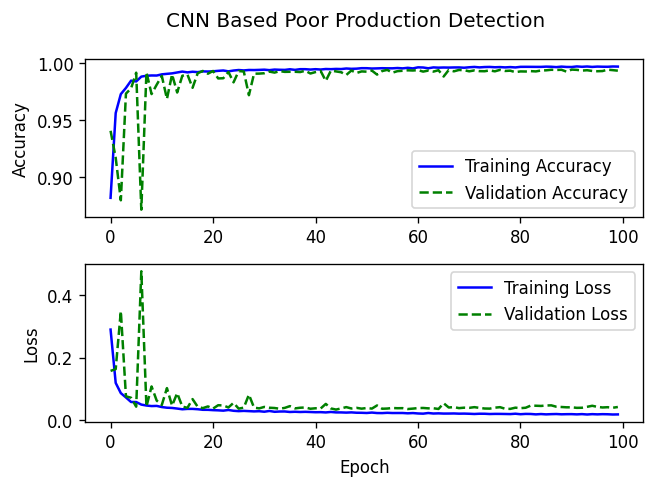

In [7]:
# evaluate
result = model.evaluate(x_test, one_hot_y_test)

test_accuracy = result[1]
print('Test loss: ', result[0]) #loss
print('Test accuracy: ', test_accuracy) #acc

# evaluate (f1 score)
y_pred = model.predict_classes(x_test)
c_report = classification_report(y_test, y_pred)
print(c_report)
c_matrix = confusion_matrix(y_test, y_pred)
print(c_matrix)

# py-plot
plt.figure(num=1,dpi=120,facecolor='white')

plt.suptitle("CNN Based Poor Production Detection")
plt.subplot(2, 1, 1)
plt.ylabel('Accuracy')
plt.plot(history.history["accuracy"], 'b', label = "Training Accuracy")
plt.plot(history.history["val_accuracy"], 'g--', label = "Validation Accuracy")
plt.legend(loc = 'lower right')

plt.subplot(2, 1, 2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history["loss"], 'b', label = "Training Loss")
plt.plot(history.history["val_loss"], 'g--', label = "Validation Loss")
plt.legend(loc = 'upper right')

plt.subplots_adjust(hspace = 0.3)

now = datetime.datetime.now()
nowDatetime = now.strftime('_%Y%m%d_%H%M%S')
#plt.savefig(this_attribute + "_" + this_model + nowDatetime + '.png')
#model.save(this_attribute + "_" + this_model+ nowDatetime +'.h5')

model.save("ShinShin")
print("Saved model to disk")

model.reset_states()
#Kbe.clear_session()

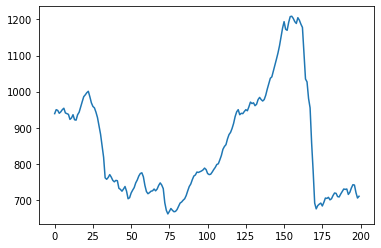

In [55]:
plt.plot(nonerror_data[1])

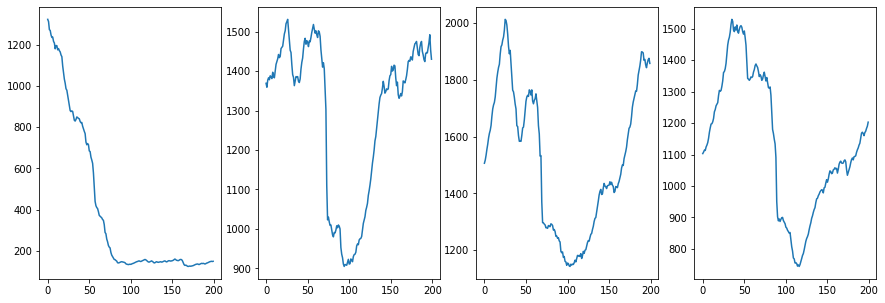

In [64]:
plt.rcParams["figure.figsize"] = (15,5)

fig, axes = plt.subplots(1,4)
i = 4
for ax in axes.flatten():
    ax.plot(error_data[i])
    i+=1
plt.show()